In [1]:
import sys
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression

## step2: 模型训练

In [3]:
x_features = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(x_features, y_label)

## step3: 模型参数查看

In [9]:
print('the weight of Logistic Regression:' , lr_clf.coef_ )
print('the intercept of Logistic Regression:', lr_clf.intercept_)

the weight of Logistic Regression: [[0.73455784 0.69539712]]
the intercept of Logistic Regression: [-0.13139986]


## step:数据模型可视化

(100, 200)
(100, 200)


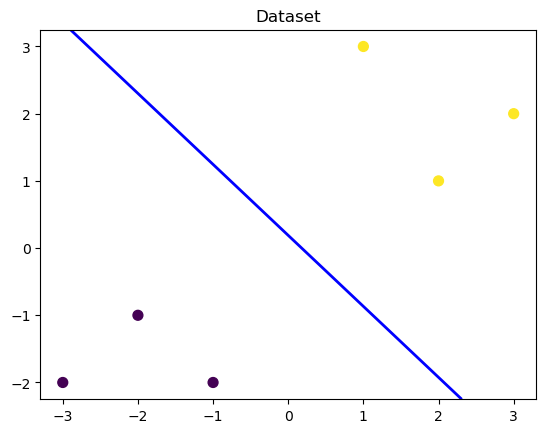

In [17]:
ax = plt.subplot(1,1,1)
ax.scatter(x_features[:, 0], x_features[:, 1], c=y_label, s=50, cmap='viridis')
ax.set_title('Dataset')

nx, ny = 200, 100
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
print(x_grid.shape)
print(y_grid.shape)
z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2, colors= 'blue')
plt.show()

C:\Users\jinta\AppData\Local\Temp\ipykernel_8392\4192414803.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
C:\Users\jinta\AppData\Local\Temp\ipykernel_8392\4192414803.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')


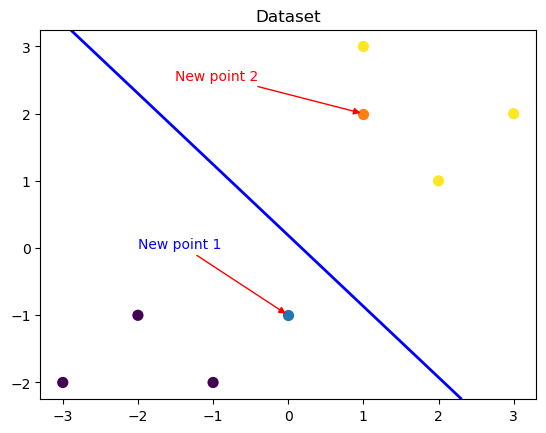

In [21]:
### 可视化预测新样本

## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(text='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(text='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_features[:,0],x_features[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

## step5:模型预测

In [22]:
y_label_new1_predict = lr_clf.predict(x_fearures_new1)
y_label_new2_predict = lr_clf.predict(x_fearures_new2)

print('The New Point 1 predict class:\n', y_label_new1_predict)
print('The New Point 2 predict class:\n', y_label_new2_predict)

y_label_new1_predict_proba = lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_fearures_new2)

print('The New Point 1 predict probability of each class:\n', y_label_new1_predict_proba)
print('The New Point 2 predict probability of each class:\n', y_label_new2_predict_proba)


The New Point 1 predict class:
 [0]
The New Point 2 predict class:
 [1]
The New Point 1 predict probability of each class:
 [[0.69567724 0.30432276]]
The New Point 2 predict probability of each class:
 [[0.11983936 0.88016064]]


## step2: 数据读取/载入

In [25]:
from sklearn.datasets import load_iris
data = load_iris()

iris_target = data.target
iris_features = pd.DataFrame(data=data.data, columns= data.feature_names)

In [27]:
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [28]:
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
pd.Series(iris_target).value_counts()

0    50
1    50
2    50
dtype: int64

In [32]:
iris_features.describe().T 

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [33]:
iris_all  = iris_features.copy()
iris_all['target'] = iris_target

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


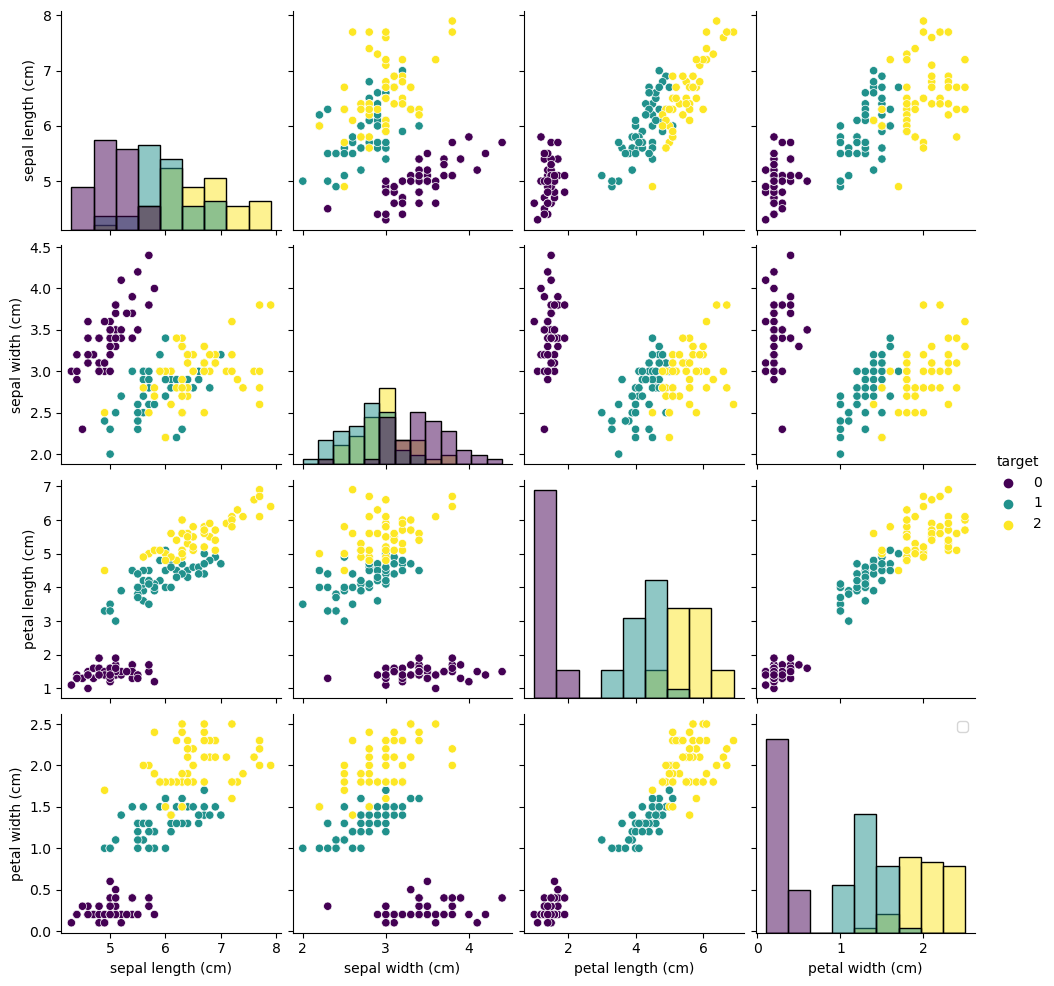

In [42]:
sns.pairplot(data=iris_all, diag_kind='hist', hue='target', palette='viridis')
plt.legend()
plt.show()

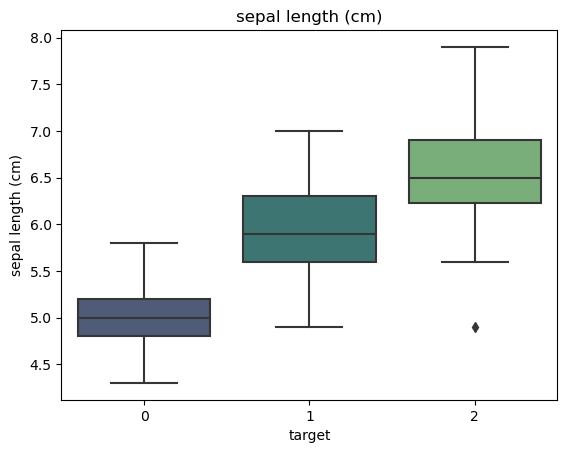

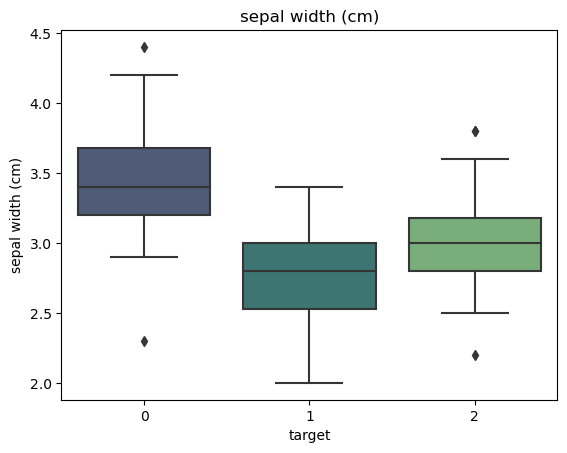

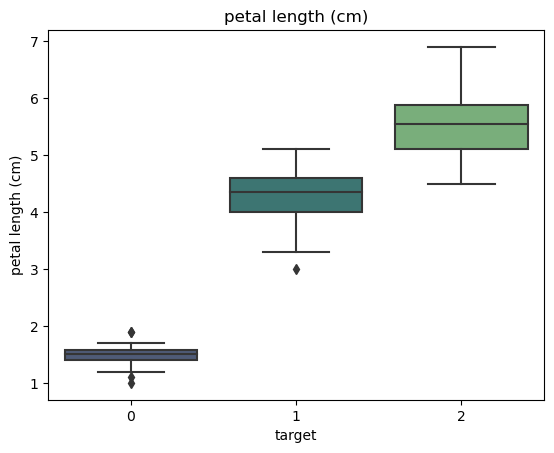

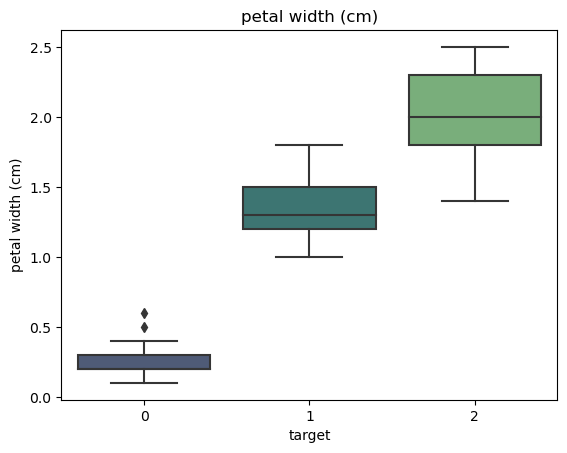

In [43]:
for col in iris_features.columns:
    sns.boxplot(x='target', y = col, saturation=0.5, palette='viridis', data=iris_all)
    plt.title(col)
    plt.show()

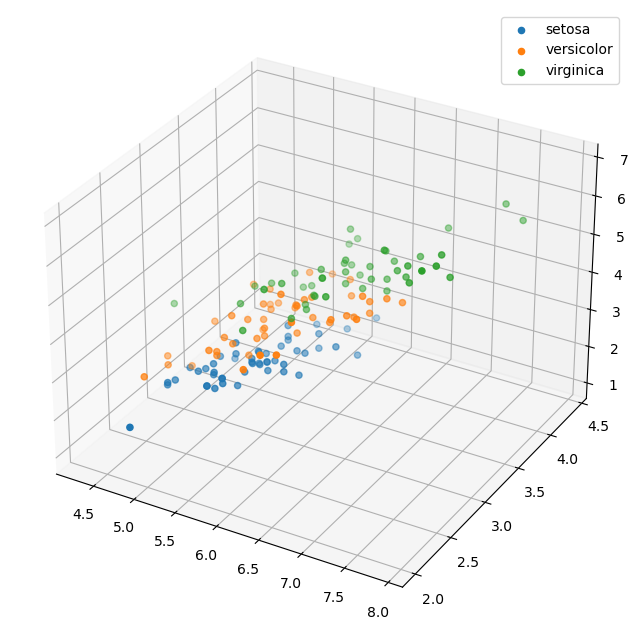

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()

### step5: 利用逻辑回归模型在二分类上进行训练和预测

In [49]:
from sklearn.model_selection import train_test_split

iris_features_part = iris_features.iloc[:100, :]
iris_target_part = iris_target[:100]

x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part, test_size=0.2, random_state=2020)

In [47]:
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [50]:
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [51]:
print(clf.coef_)
print(clf.intercept_)


[[ 0.45181973 -0.81743611  2.14470304  0.89838607]]
[-6.53367714]


In [52]:
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

the accuracy of LR is: 1.0
the accuracy of LR is: 1.0
the confusion matrix result:
 [[ 9  0]
 [ 0 11]]


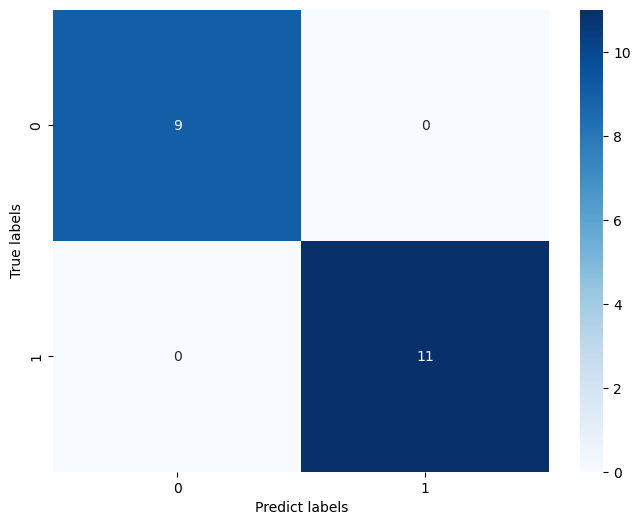

In [57]:
from sklearn import metrics

print('the accuracy of LR is:', metrics.accuracy_score(y_true=y_train, y_pred=train_predict))
print('the accuracy of LR is:', metrics.accuracy_score(y_true=y_test, y_pred=test_predict))

#查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(y_test, test_predict)
print('the confusion matrix result:\n', confusion_matrix_result)

#热力图可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predict labels')
plt.ylabel('True labels')
plt.show()

In [59]:
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state=2020)

In [60]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [62]:
print(clf.coef_)
print(clf.intercept_)

[[-0.45928925  0.83069881 -2.26606533 -0.99743979]
 [ 0.33117318 -0.7286342  -0.06841147 -0.98711031]
 [ 0.12811607 -0.10206461  2.33447681  1.9845501 ]]
[  9.43880697   3.93047362 -13.3692806 ]


In [64]:
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('the test predict probability of each class:\n', test_predict_proba)

print('the accuracy of LR is:',  metrics.accuracy_score(y_train, train_predict))
print('the accuracy of LR is:',  metrics.accuracy_score(y_test, test_predict))

the test predict probability of each class:
 [[1.03461728e-05 2.33279470e-02 9.76661707e-01]
 [9.69926591e-01 3.00732877e-02 1.21676984e-07]
 [2.09992541e-02 8.69156620e-01 1.09844126e-01]
 [3.61934863e-03 7.91979967e-01 2.04400684e-01]
 [7.90943182e-03 8.00605302e-01 1.91485266e-01]
 [7.30034971e-04 6.60508053e-01 3.38761913e-01]
 [1.68614205e-04 1.86322043e-01 8.13509343e-01]
 [1.06915334e-01 8.90815530e-01 2.26913654e-03]
 [9.46928069e-01 5.30707311e-02 1.20016049e-06]
 [9.62346383e-01 3.76532247e-02 3.91897266e-07]
 [1.19533377e-04 1.38823466e-01 8.61057000e-01]
 [8.78881891e-03 6.97207366e-01 2.94003815e-01]
 [9.73938142e-01 2.60617357e-02 1.22613829e-07]
 [1.78434053e-03 4.79518178e-01 5.18697481e-01]
 [5.56924334e-04 2.46776841e-01 7.52666235e-01]
 [9.83549841e-01 1.64500679e-02 9.13617215e-08]
 [1.65201480e-02 9.54672749e-01 2.88071029e-02]
 [8.99853666e-03 7.82707578e-01 2.08293885e-01]
 [2.98015013e-05 5.45900057e-02 9.45380193e-01]
 [9.35695866e-01 6.43039487e-02 1.85301331e

[[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


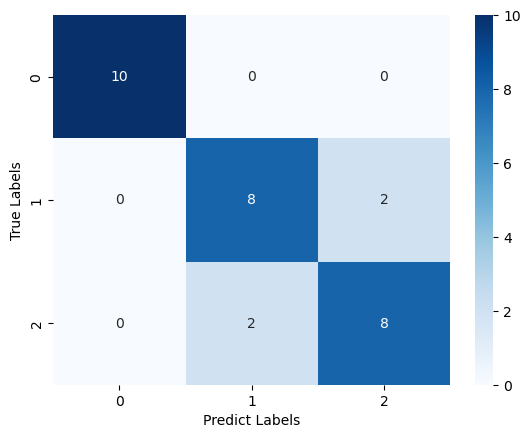

In [66]:
#查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(y_test, test_predict)
print(confusion_matrix_result)

plt.figure()
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predict Labels')
plt.ylabel('True Labels')
plt.show()
